# Testing the DWG model on an example from Walt Whitman's *Leaves of Grass*

This is the implementation of the discussion found in **Chapter 6** of my dissertation. After discussing the possibility of non-political dogwhistles, we study a specific example from Walt Whitman's poem *Among the Multitude*, which presents a case of ambiguous reference. According to who you think is talking, the referent to *lover* in the following line could be either male or female:

- *Ah, lover and perfect equal*

The poem is specifically avoiding any reference to the gender of the *lover* in the crowd, who could very much be identified as either male or female. In fact, both readings exist and are attested (see dissertation), and a third reading  encompassing both possibilities is also existent. 

The philosophical underpinnings of this and the question of whether the model is appropriate to describe that specific situation are found in the dissertation, this is merely the implementation and some analysis of the results.

We will first begin by loading the necessary files for the implementation of the model.

In [1]:
# Import packages

from players import *
from lexica import *
from helpers import *
from viz import *

## Setting the messages and personae sets and priors

We then list all the worlds, personae and messages we want to take into account in the model along with their semantics. We also set the $\Pi$-LEX and SOC-LEX functions, for each of the two possible readers we initially assume.

Regarding the lexica: the idea here is that a *gay friendly* reader will entertain the possibility of a *gay poet* persona more easily. Specifically, if no information about the persona of the speaker is contained within the semantics of the term, they will conceive of the term being compatible with either a *gay* or a *straight* poet, whereas the *straight default* reader will typically ignore the possibility of a *gay poet* unless it is made explicit by the content.

In [2]:

# For gay friendly reader
# Define priors over possible worlds here, they have to add up to 1.
world_priors_gf = {"wM": 0.5, "wF": 0.5}

# Define priors over personae here. They have to add up to 1.
pers_priors_gf = {"piGP": 0.5, "piSP": 0.5}

delta_soc_gf = {"soc_GF": 1, "soc_SD": 0}

pi_lex_gf = {"piGP": {"lex_GP": 1, "lex_SP": 0}, "piSP": {"lex_GP": 0, "lex_SP": 1}}

# Build priors as an instance of the Priors class.
priors_gf = Priors(world_priors_gf, pers_priors_gf, delta_soc_gf, pi_lex_gf)

# For straight default reader
# Define priors over possible worlds here, they have to add up to 1.
world_priors_sd = {"wM": 0.5, "wF": 0.5}

# Define priors over personae here. They have to add up to 1.
pers_priors_sd = {"piGP": 0.5, "piSP": 0.5}

delta_soc_sd = {"soc_GF": 0, "soc_SD": 1}

pi_lex_sd = {"piGP": {"lex_GP": 1, "lex_SP": 0}, "piSP": {"lex_GP": 0, "lex_SP": 1}}

# Build priors as an instance of the Priors class.
priors_sd = Priors(world_priors_sd, pers_priors_sd, delta_soc_sd, pi_lex_sd)

# Build utterances, one per preferred indexation/interpretation function
# for each player

utterances_gf = {
    "lover": {"worlds": ["wM"], "personae": ["piGP", "piSP"]},
    "donna": {"worlds": ["wF"], "personae": ["piSP"]},
    "gallant": {"worlds": ["wM"], "personae": ["piGP"]},
}

utterances_sd = {
    "lover": {"worlds": ["wF"], "personae": ["piSP"]},
    "donna": {"worlds": ["wF"], "personae": ["piSP"]},
    "gallant": {"worlds": ["wM"], "personae": ["piGP"]},
}
# Constructing lexica and storing in lists

socs = [Pers(utterances_sd, "soc_SD"), Pers(utterances_gf, "soc_GF")]
lexs = [Lex(utterances_sd, "lex_SP"), Lex(utterances_gf, "lex_GP")]


## Literal Listeners

Let's check the results for our literal listeners.

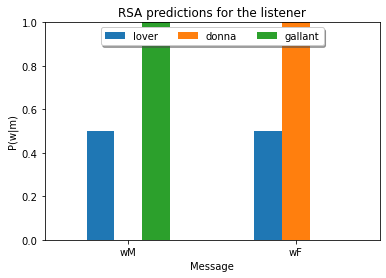

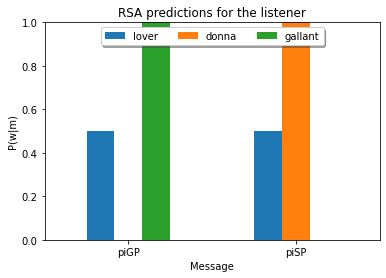

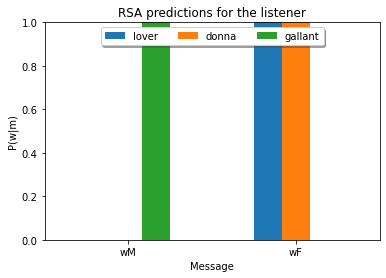

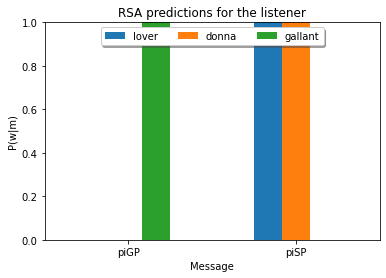

In [3]:
# Literal listeners
L_0_gf = Player(priors_gf)
L_0_sd = Player(priors_sd)

# Vizualize
lis_viz(L_0_gf, socs, lexs)
lis_viz(L_0_gf, socs, lexs, interpretation="personae_interpretation")

lis_viz(L_0_sd, socs, lexs)
lis_viz(L_0_sd, socs, lexs, interpretation="personae_interpretation")

### Results
We can see that the *straight default* listener is much more certain in its Literal listener state. The *gay friendly* listener, on the other hand, is incapable of choosing an interpretation for "lover". The other two terms are straightforward.

## Pragmatic listeners

Let's look at what pragmatic listeners might say. Again, pragmatic listeners in this model envision a single speaker that is a regular speaker sharing their priors.

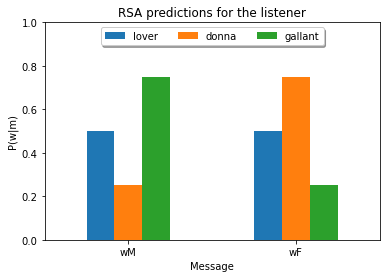

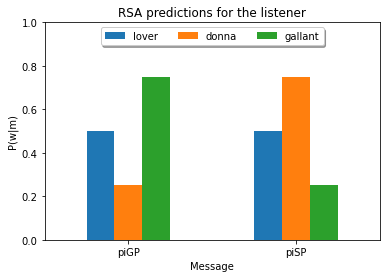

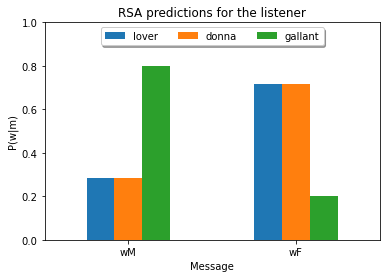

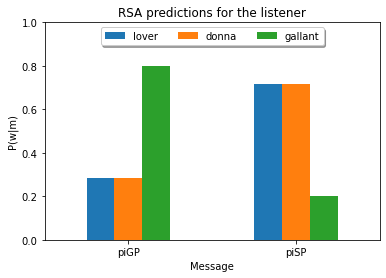

In [4]:
# Pragmatic Listeners
Lis_1_gf = Listener(priors_gf)

lis_viz(Lis_1_gf, socs, lexs)
lis_viz(Lis_1_gf, socs, lexs, interpretation="personae_interpretation")


Lis_1_sd = Listener(priors_sd)

lis_viz(Lis_1_sd, socs, lexs)
lis_viz(Lis_1_sd, socs, lexs, interpretation="personae_interpretation")


### Results

This is very reminiscent of what we had with standard DWG from chapter 5. Interestingly, it is quite unlikely that the *straight default* reader will interpret "lover" as referring to a female character, while the *gay friendly* reader, again... cannot choose! While the other two terms lead to clear preferences in interpretation, it is impossible for them to have a clear interpretation of "lover". This is in keeping with what we would expect.

## $L_2$ 

Just for the sake of it, even though we know what is going to happen, let's have a look at $L_2$ with those priors.

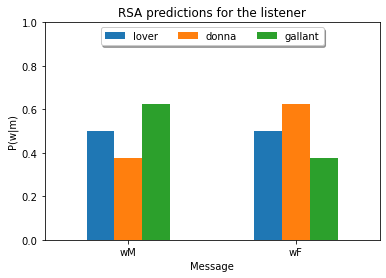

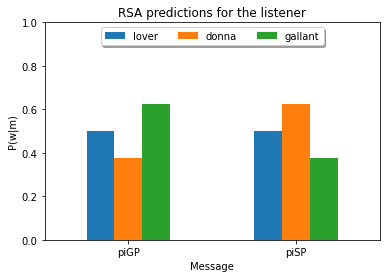

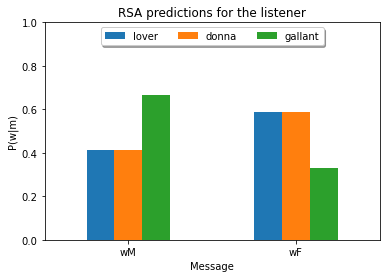

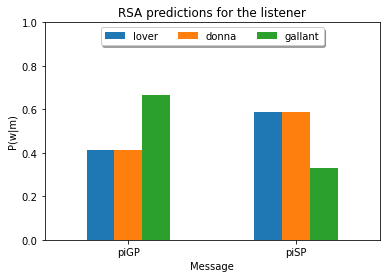

In [5]:
# L_2
Lis_2_gf = ListenerPlus(priors_gf)

lis_viz(Lis_2_gf, socs, lexs)
lis_viz(Lis_2_gf, socs, lexs, interpretation="personae_interpretation")


Lis_2_sd = ListenerPlus(priors_sd)

lis_viz(Lis_2_sd, socs, lexs)
lis_viz(Lis_2_sd, socs, lexs, interpretation="personae_interpretation")

### Results

Interestingly, "lover" remains absolutely uninformative for the *gay friendly* reader. Otherwise this evolves just like DWG evolved in chapter 5, adding uncertainty at each round.

## Another listener

One thing that must be underlined is that the results for both readers can be changed dramatically if we change their priors regarding the persona of the speaker. Let's define a *super gay friendly* reader that is almost certain that the speaker is in fact a *gay poet*. 

In [6]:
# For super gay friendly reader
# Define priors over possible worlds here, they have to add up to 1.
world_priors_sgf = {"wM": 0.5, "wF": 0.5}

# Define priors over personae here. They have to add up to 1.
pers_priors_sgf = {"piGP": 0.8, "piSP": 0.2}

delta_soc_sgf = {"soc_GF": 1, "soc_SD": 0}

pi_lex_sgf = {"piGP": {"lex_GP": 1, "lex_SP": 0}, "piSP": {"lex_GP": 0, "lex_SP": 1}}

# Build priors as an instance of the Priors class.
priors_sgf = Priors(world_priors_sgf, pers_priors_sgf, delta_soc_sgf, pi_lex_sgf)

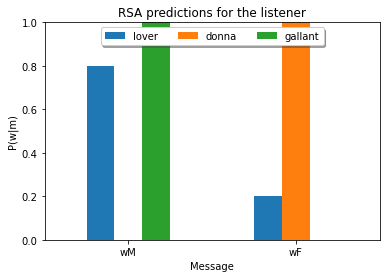

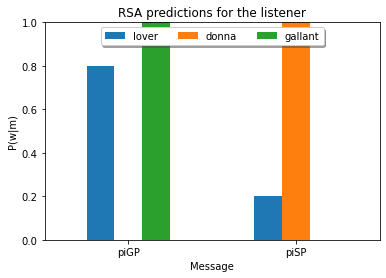

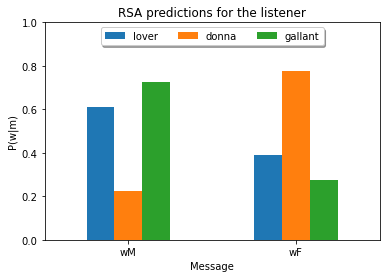

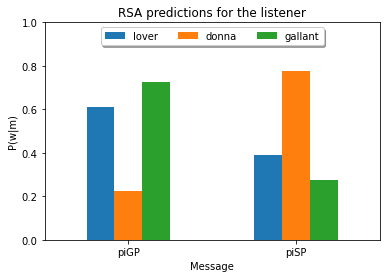

In [7]:
# Literal listeners
L_0_sgf = Player(priors_sgf)
lis_viz(L_0_sgf, socs, lexs)
lis_viz(L_0_sgf, socs, lexs, interpretation="personae_interpretation")

Lis_1_sgf = Listener(priors_sgf)
lis_viz(Lis_1_sgf, socs, lexs)
lis_viz(Lis_1_sgf, socs, lexs, interpretation="personae_interpretation")

### Results

We see now that this speaker is much more certain that "lover" means that the referent is male. Once again however, each iteration of recursive reasoning adds more uncertainty. Given how we defined SOC-LEX and $\Pi$-LEX, we have slightly different results for a hypothetical *super straight default* reader. It reduces uncertainty overall.

In [10]:
# For super straight default reader
# Define priors over possible worlds here, they have to add up to 1.
world_priors_ssd = {"wM": 0.5, "wF": 0.5}

# Define priors over personae here. They have to add up to 1.
pers_priors_ssd = {"piGP": 0.8, "piSP": 0.2}

delta_soc_ssd = {"soc_GF": 0, "soc_SD": 1}

pi_lex_ssd = {"piGP": {"lex_GP": 1, "lex_SP": 0}, "piSP": {"lex_GP": 0, "lex_SP": 1}}

# Build priors as an instance of the Priors class.
priors_ssd = Priors(world_priors_ssd, pers_priors_ssd, delta_soc_ssd, pi_lex_ssd)

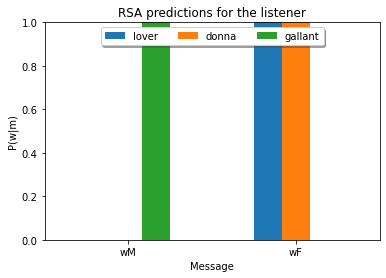

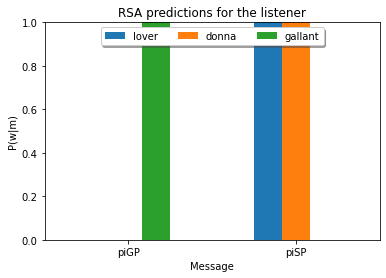

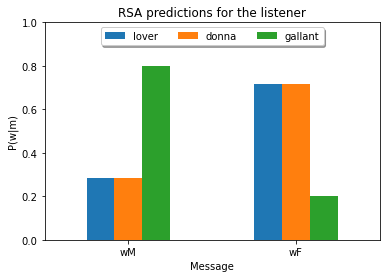

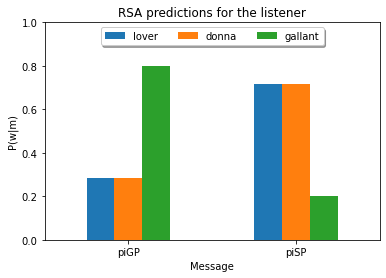

In [11]:
# Literal listeners
L_0_ssd = Player(priors_ssd)
lis_viz(L_0_ssd, socs, lexs)
lis_viz(L_0_ssd, socs, lexs, interpretation="personae_interpretation")

Lis_1_ssd = Listener(priors_ssd)
lis_viz(Lis_1_ssd, socs, lexs)
lis_viz(Lis_1_ssd, socs, lexs, interpretation="personae_interpretation")

## A Cagey Listener as a reader

The gay friendly reader is nice in the sense the admit that it is impossible to know what the gender of the referent of "lover" is. But if we take the case of the transcendental reading of the poem, what we want is not merely a completely uncertain reader, but a reader that accepts the fact that there can be two simultaneous interpretations. This is a thing that the *cagey listener* can do in our model.

If we construct such a reader and look at its predictions (not uncovering), we end up with something along the lines of what we want, taking as literal listeners the simple *gay friendly* and *straight default* readers that we defined in the beginning.

In [12]:
# World preferences for the scholarly reader

no_world_preferences = preferences_generation(list(world_priors_gf.keys()))
no_personae_preferences = preferences_generation(list(pers_priors_gf.keys()))

L_Cag = CageyListener(
    [priors_gf, priors_sd], no_world_preferences, no_personae_preferences
)

L_Cag.full_predictions(socs, lexs)

There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible situation.
There is at least one impossible

{'lover': {'worlds_predictions': {('wF', 'wF'): 0.22527472527472528,
   ('wM', 'wM'): 0.08791208791208792,
   ('wF', 'wM'): 0.21978021978021978,
   ('wM', 'wF'): 0.46703296703296704},
  'pers_predictions': {('piGP', 'piGP'): 0.08791208791208792,
   ('piSP', 'piSP'): 0.22527472527472528,
   ('piGP', 'piSP'): 0.46703296703296704,
   ('piSP', 'piGP'): 0.21978021978021978}},
 'donna': {'worlds_predictions': {('wF', 'wF'): 0.5877192982456141,
   ('wM', 'wM'): 0.10526315789473686,
   ('wF', 'wM'): 0.17543859649122806,
   ('wM', 'wF'): 0.13157894736842107},
  'pers_predictions': {('piGP', 'piGP'): 0.10526315789473686,
   ('piSP', 'piSP'): 0.5877192982456141,
   ('piGP', 'piSP'): 0.13157894736842107,
   ('piSP', 'piGP'): 0.17543859649122806}},
 'gallant': {'worlds_predictions': {('wF', 'wF'): 0.07792207792207793,
   ('wM', 'wM'): 0.5974025974025975,
   ('wF', 'wM'): 0.19480519480519481,
   ('wM', 'wF'): 0.12987012987012989},
  'pers_predictions': {('piGP', 'piGP'): 0.5974025974025975,
   ('piS